In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv(r"C:\Users\resha\Downloads\cricket_data.csv")

In [12]:
df_clean = df.copy()

In [14]:
def clean_numeric_column(column, remove_star=False):
    col = df_clean[column].astype(str)
    if remove_star:
        col = col.str.replace('*', '', regex=False)
    col = pd.to_numeric(col, errors='coerce')
    df_clean[column] = col

In [16]:
numeric_columns = [
    "Matches_Batted", "Not_Outs", "Runs_Scored", "Batting_Average", "Balls_Faced",
    "Batting_Strike_Rate", "Centuries", "Half_Centuries", "Fours", "Sixes",
    "Catches_Taken", "Stumpings", "Matches_Bowled", "Balls_Bowled", "Runs_Conceded",
    "Wickets_Taken", "Bowling_Average", "Economy_Rate", "Bowling_Strike_Rate",
    "Four_Wicket_Hauls", "Five_Wicket_Hauls"
]

In [18]:
for col in numeric_columns:
    clean_numeric_column(col)

In [20]:
clean_numeric_column("Highest_Score", remove_star=True)

In [22]:
df_clean["Year"] = pd.to_numeric(df_clean["Year"], errors='coerce')

In [24]:
df_clean.dropna(subset=["Year", "Player_Name"], inplace=True)

In [26]:
df_clean.describe()

,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
count,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,...,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,2019.233628,9.016814,1.487611,132.253097,33.241593,17.442761,98.638053,102.314991,0.042478,0.735398,...,0.163717,9.049558,92.946903,125.013274,4.459292,18.572442,5.471097,13.050177,0.079646,0.017699
std,3.992500,5.527504,1.697267,171.061138,32.438114,16.530296,122.684820,59.184873,0.269437,1.383147,...,0.704731,5.516159,118.389409,153.815733,6.363274,23.806204,4.568269,15.710709,0.310478,0.131914
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,0.000000,5.000000,4.000000,1.000000,6.000000,66.165000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,10.000000,1.000000,42.000000,23.000000,14.575000,38.000000,118.950000,0.000000,0.000000,...,0.000000,10.000000,27.000000,44.500000,1.000000,15.340000,7.250000,12.000000,0.000000,0.000000
75%,2022.750000,14.000000,2.000000,227.000000,58.000000,28.287500,167.000000,139.820000,0.000000,1.000000,...,0.000000,14.000000,168.750000,236.000000,8.000000,29.382500,8.800000,21.967500,0.000000,0.000000
max,2024.000000,19.000000,10.000000,973.000000,140.000000,101.000000,640.000000,400.000000,4.000000,9.000000,...,6.000000,19.000000,408.000000,564.000000,32.000000,189.000000,36.000000,120.000000,3.000000,1.000000


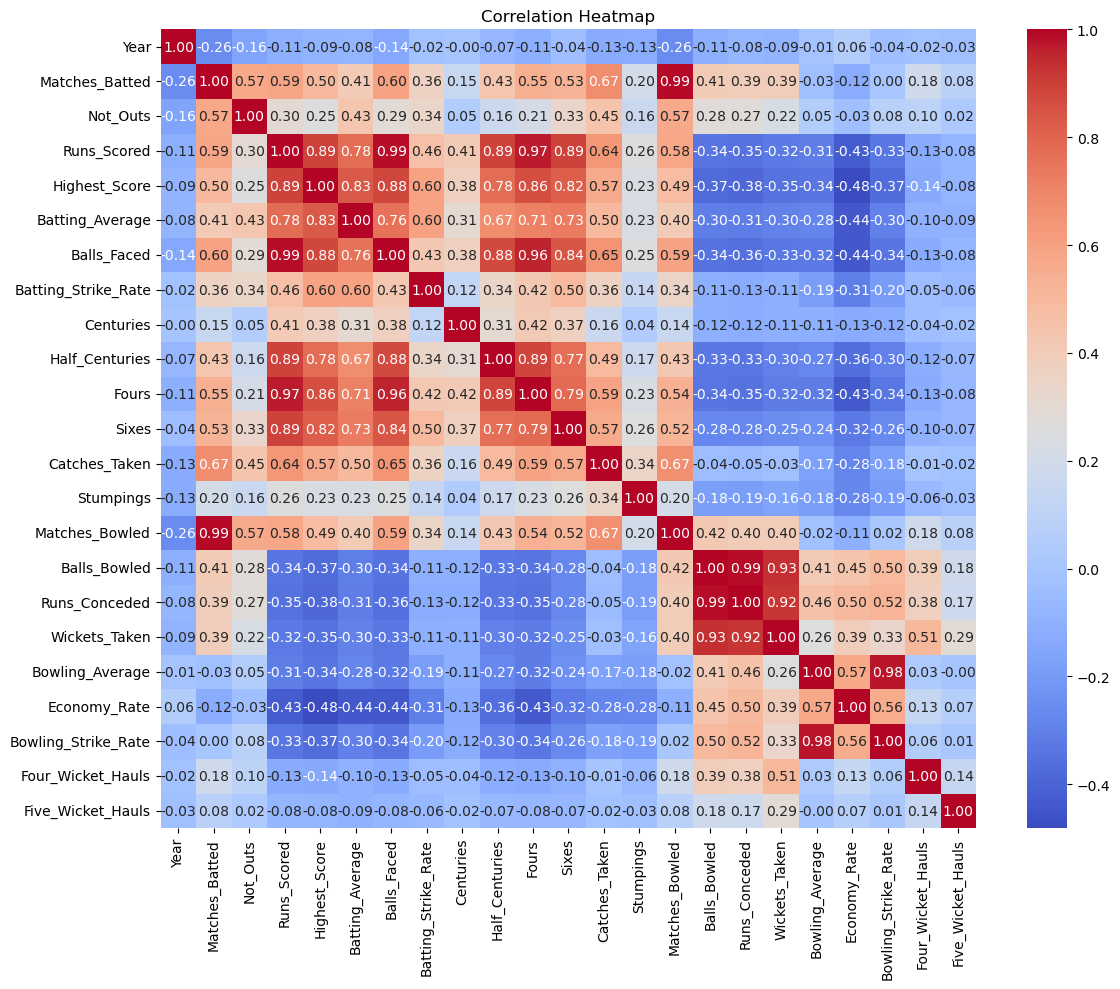

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [30]:
top_scorers = df_clean.groupby("Player_Name")["Runs_Scored"].sum().sort_values(ascending=False).head(10)

In [32]:
top_scorers

Player_Name
Virat Kohli       7361.0
Shikhar Dhawan    6684.0
David Warner      6426.0
Rohit Sharma      6254.0
MS Dhoni          5082.0
Dinesh Karthik    4582.0
Ajinkya Rahane    4439.0
KL Rahul          4221.0
Faf du Plessis    4171.0
Sanju Samson      3970.0
Name: Runs_Scored, dtype: float64

C:\Users\resha\AppData\Local\Temp\ipykernel_12500\3080154282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="viridis")


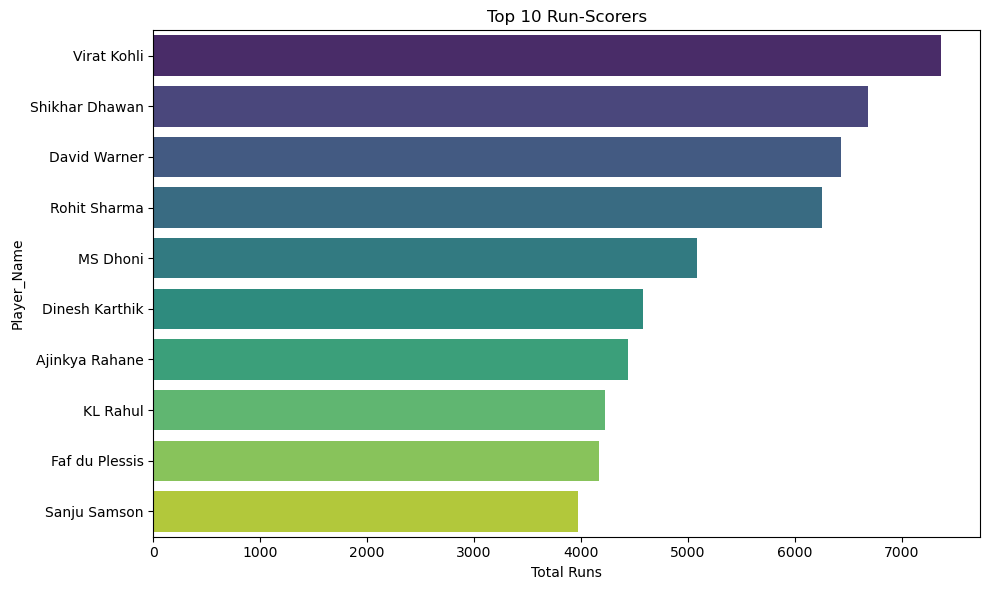

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="viridis")
plt.xlabel("Total Runs")
plt.title("Top 10 Run-Scorers")
plt.tight_layout()
plt.show()

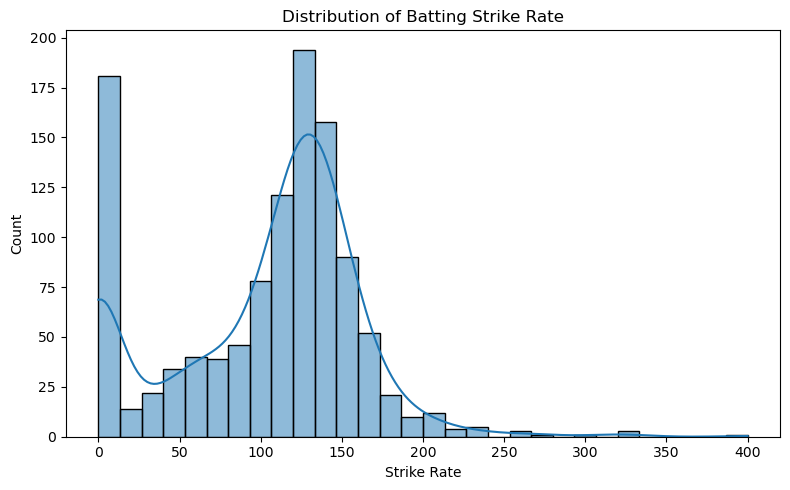

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["Batting_Strike_Rate"].dropna(), bins=30, kde=True)
plt.title("Distribution of Batting Strike Rate")
plt.xlabel("Strike Rate")
plt.tight_layout()
plt.show()

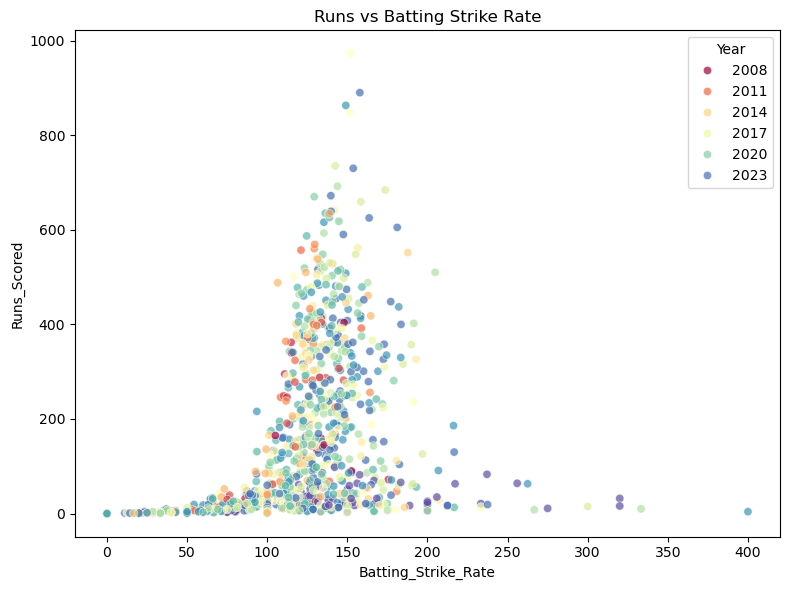

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="Batting_Strike_Rate", y="Runs_Scored", hue="Year", palette="Spectral", alpha=0.7)
plt.title("Runs vs Batting Strike Rate")
plt.tight_layout()
plt.show()

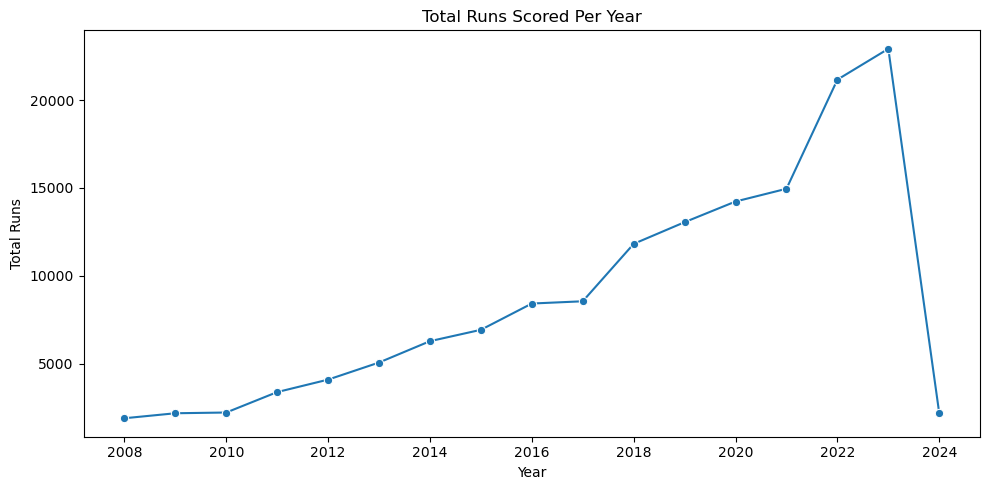

In [40]:
plt.figure(figsize=(10, 5))
yearly_runs = df_clean.groupby("Year")["Runs_Scored"].sum()
sns.lineplot(x=yearly_runs.index, y=yearly_runs.values, marker="o")
plt.title("Total Runs Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

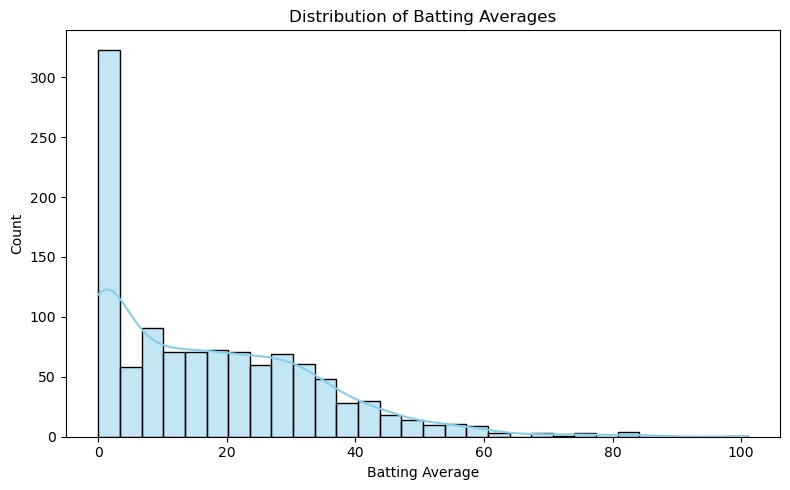

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["Batting_Average"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribution of Batting Averages")
plt.xlabel("Batting Average")
plt.tight_layout()
plt.show()

C:\Users\resha\AppData\Local\Temp\ipykernel_12500\900358945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_centuries.values, y=top_centuries.index, palette="magma")


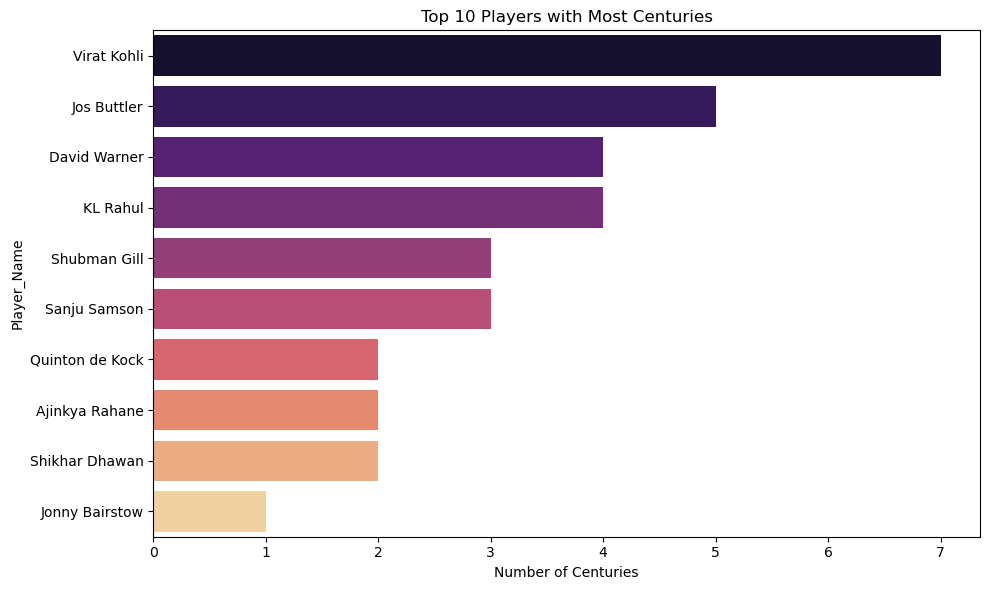

In [44]:
top_centuries = df_clean.groupby("Player_Name")["Centuries"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_centuries.values, y=top_centuries.index, palette="magma")
plt.title("Top 10 Players with Most Centuries")
plt.xlabel("Number of Centuries")
plt.tight_layout()
plt.show()

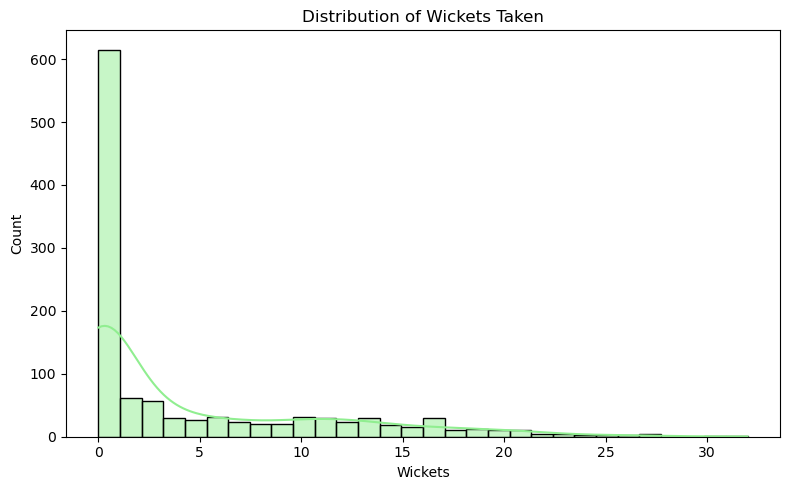

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["Wickets_Taken"].dropna(), bins=30, kde=True, color="lightgreen")
plt.title("Distribution of Wickets Taken")
plt.xlabel("Wickets")
plt.tight_layout()
plt.show()

C:\Users\resha\AppData\Local\Temp\ipykernel_12500\2125005428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wickets.values, y=top_wickets.index, palette="coolwarm")


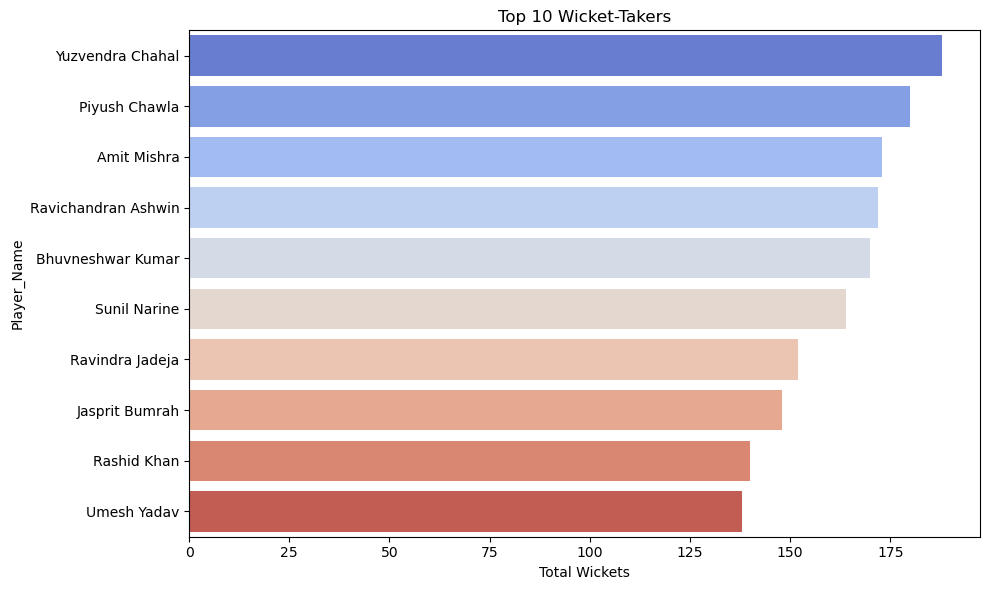

In [48]:
top_wickets = df_clean.groupby("Player_Name")["Wickets_Taken"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_wickets.values, y=top_wickets.index, palette="coolwarm")
plt.title("Top 10 Wicket-Takers")
plt.xlabel("Total Wickets")
plt.tight_layout()
plt.show()